In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = files.upload()

Saving kddcup data_10_percent_corrected.csv.csv to kddcup data_10_percent_corrected.csv.csv


In [5]:
 data = pd.read_csv("kddcup data_10_percent_corrected.csv.csv")
data

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


**DATA PREPROCESSING**

In [6]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
       
columns.append('target')
#print(columns)
print(len(columns))


42


CATEGORICAL FEATURES DISTRIBUTION

In [ ]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')

In [7]:
#print("Read {} rows.".format(len(data)))
#print('='*40)
#print('The number of data points are:', data.shape[0])
#print('='*40)
#print('The number of features are:', data.shape[1])
#print('='*40)
#output = data['outcome'].values
#labels = set(output)
#print('The different type of output labels are:', labels)
#print('='*125)
#print('The number of different output labels are:', len(labels))

Normalising data to binary values

In [9]:
data['normal.'] = data['normal.'].replace(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.', 'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.', 'smurf.', 'spy.', 'teardrop.', 'warezclient.', 'warezmaster.'], 'attack')

In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 41].values

Encoding Categorical data

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1 = LabelEncoder()
labelencoder_x_2 = LabelEncoder()
labelencoder_x_3 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])
x[:, 3] = labelencoder_x_3.fit_transform(x[:, 3])

Train_test split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

MODEL TRAINING

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

NAIVE BAYES

In [14]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

DECISION TREE

In [15]:
from sklearn.metrics import classification_report
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

COMBINING CLASSIFIERS

In [16]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('nb', nb_classifier), ('dt', tree_clf)], voting='soft')
ensemble_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [17]:
y_pred = ensemble_clf.predict(x_test)

Confusion Matrix

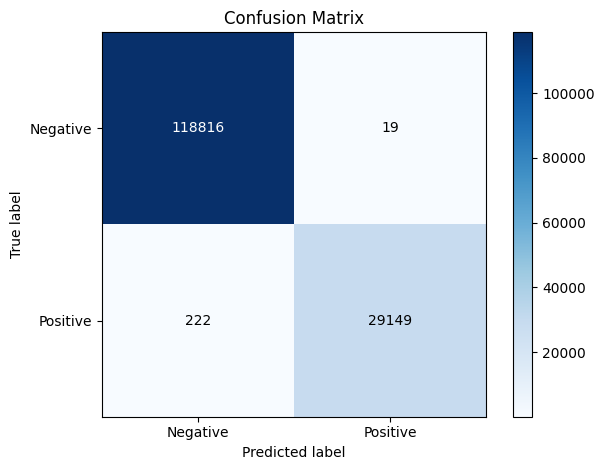

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]), ha="center", va="center", 
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()









In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ensemble_clf, X = x_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

0.00020025647467123984

NAIVE BAYES METRICS

In [20]:
#the performance of the classification model
print("the Accuracy is: "+ str((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])))
recall = cm[1,1]/(cm[0,1]+cm[1,1])
print("Recall is : "+ str(recall))
print("False Positive rate: "+ str(cm[1,0]/(cm[0,0]+cm[1,0])))
precision = cm[1,1]/(cm[1,0]+cm[1,1])
print("Precision is: "+ str(precision))
print("F-measure is: "+ str(2*((precision*recall)/(precision+recall))))
from math import log
print("Entropy is: "+ str(-precision*log(precision)))

the Accuracy is: 0.9983738849979084
Recall is : 0.999348601206802
False Positive rate: 0.0018649506880155917
Precision is: 0.9924415239521978
F-measure is: 0.995883086489349
Entropy is: 0.007529838524493045


COMBINED RESULTS

In [21]:
accuracy = ensemble_clf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9983738849979084


In [22]:
tree_preds = tree_clf.predict(x_test)
nb_preds = nb_classifier.predict(x_test)


In [24]:
import pickle

model = ensemble_clf

# Save the model as a PKL file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
